In [32]:
%matplotlib inline
%config InlineBackend.figure_format = 'retina'

import os
from supabase import create_client, Client
from dotenv import load_dotenv

load_dotenv()

url: str = os.environ.get("SUPABASE_URL")
key: str = os.environ.get("SUPABASE_KEY")
supabase: Client = create_client(url, key)


In [33]:
response = supabase.table("color_test_results").select("*").execute()

In [34]:
import pandas as pd

df = pd.DataFrame(response.data)
df = df.query("version == '0.0.2'")

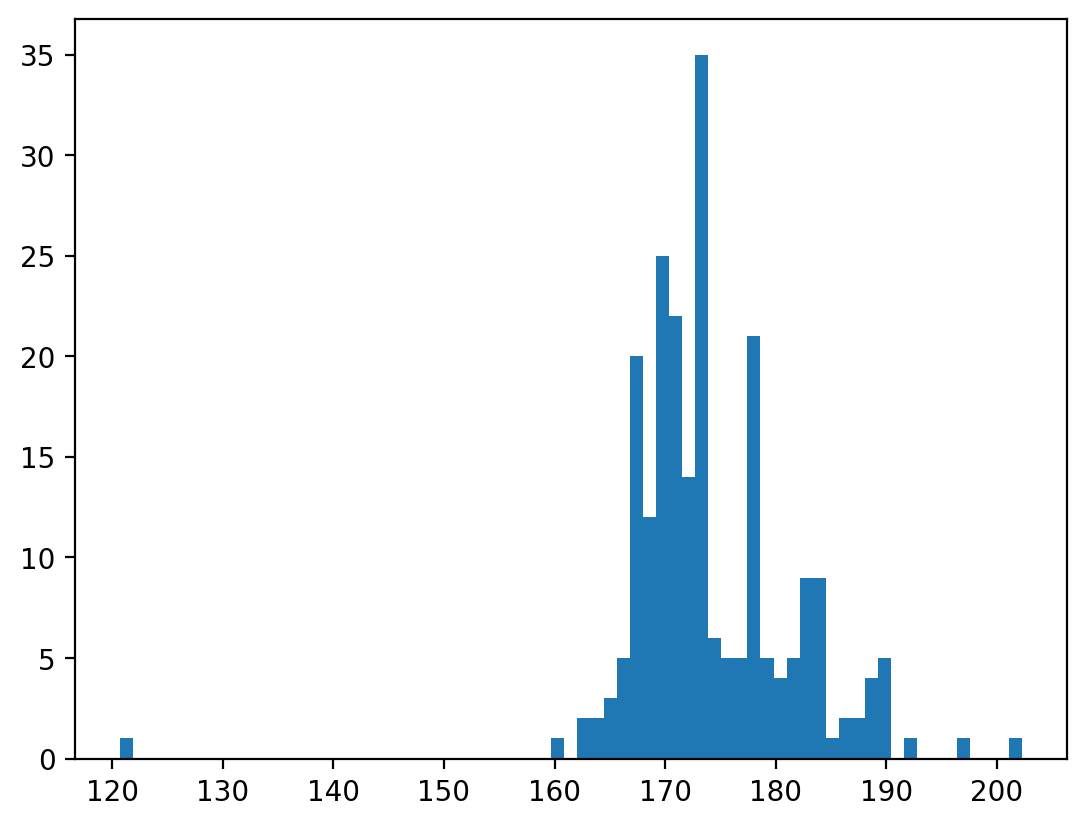

In [35]:
import matplotlib.pyplot as plt

counts, bins, _ = plt.hist(df.final_hue, bins=69)

In [36]:
import numpy as np

xy = df.final_hue.value_counts().sort_index().reset_index()
final_hue_raw = xy["final_hue"].values
raw_count = xy["count"].values
raw_count = raw_count / raw_count.sum()

count = np.cumsum(raw_count) / raw_count.sum()
count = np.stack((np.concatenate(([0.0], count[:-1])), count), axis=1)
final_hue = np.stack((final_hue_raw, final_hue_raw), axis=1)
#count = np.concatenate(([0.0], count))
#final_hue, count

#final_hue, count
count = count.ravel()
final_hue = final_hue.ravel()

count, final_hue

(array([0.        , 0.00438596, 0.00438596, 0.00877193, 0.00877193,
        0.01754386, 0.01754386, 0.02631579, 0.02631579, 0.03070175,
        0.03070175, 0.03947368, 0.03947368, 0.06140351, 0.06140351,
        0.14912281, 0.14912281, 0.19736842, 0.19736842, 0.20175439,
        0.20175439, 0.31140351, 0.31140351, 0.34210526, 0.34210526,
        0.36842105, 0.36842105, 0.40789474, 0.40789474, 0.46929825,
        0.46929825, 0.50438596, 0.50438596, 0.62280702, 0.62280702,
        0.63157895, 0.63157895, 0.64912281, 0.64912281, 0.65350877,
        0.65350877, 0.67105263, 0.67105263, 0.6754386 , 0.6754386 ,
        0.69298246, 0.69298246, 0.74122807, 0.74122807, 0.77192982,
        0.77192982, 0.78508772, 0.78508772, 0.78947368, 0.78947368,
        0.80701754, 0.80701754, 0.8245614 , 0.8245614 , 0.82894737,
        0.82894737, 0.84649123, 0.84649123, 0.88157895, 0.88157895,
        0.88596491, 0.88596491, 0.89912281, 0.89912281, 0.90350877,
        0.90350877, 0.9254386 , 0.9254386 , 0.92

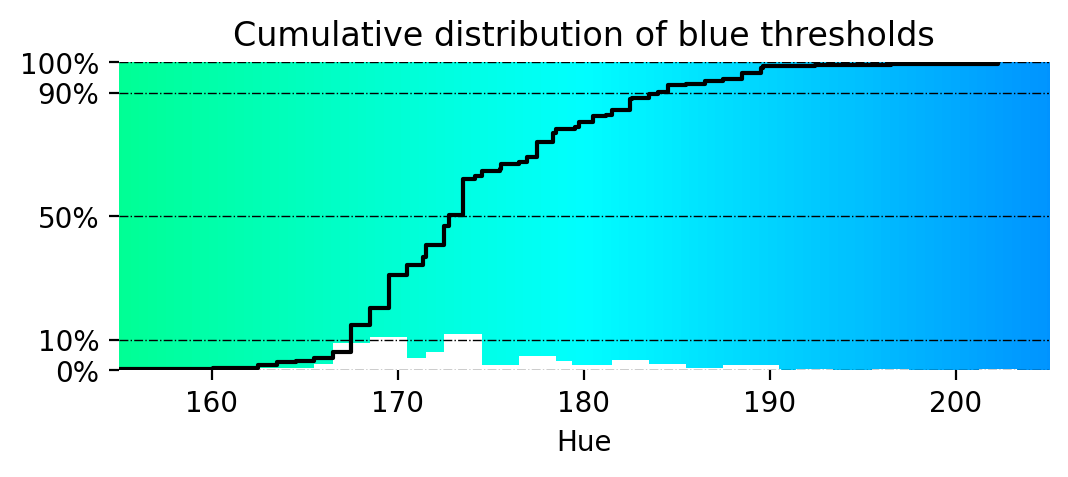

In [37]:
import numpy as np
from matplotlib.colors import LinearSegmentedColormap
from matplotlib.patches import Rectangle
from colorsys import hls_to_rgb

from colorsys import hls_to_rgb

data = []
for i in range(120, 241):
    data.append(hls_to_rgb(i / 360, .5, 1))  # HSL(120, 100, 50)
cmap = LinearSegmentedColormap.from_list("custom", data)

# Create gradient background
gradient = np.linspace(0, 1, 256).reshape(1, -1)
plt.figure(figsize=(6, 2))
plt.imshow(gradient, aspect='auto', extent=[120, 240, 0, 1], cmap=cmap)

plt.bar(final_hue_raw, raw_count, color='white', alpha=1, width=2)
plt.plot(final_hue, count, '-', color='black')

plt.xlim((155, 205))
plt.xlabel("Hue")
plt.yticks([0, .1, .5, .9, 1], ["0%", "10%", "50%", "90%", "100%"])
plt.box(False)
plt.title("Cumulative distribution of blue thresholds")

plt.grid(True, axis='y', color='black', linestyle='-.', linewidth=0.5)